## Setup

In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [42]:
df_raw = pd.read_csv('./KaDo.csv')

In [43]:
df = df_raw.copy()

In [44]:
df_raw.columns

Index(['TICKET_ID', 'MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE',
       'LIBELLE', 'CLI_ID'],
      dtype='object')

## Recommandation par profile d'acheteur (Gros acheteur ponctuel VS petit acheteur de tous les jours) 

### 1ere Etape: calculer nbr item par panier et total panier pour chaque client


### 2me Etape: calculer nbr item par panier  par client et total panier par client - pour chaque mail


In [45]:
df["NB_T"] = 1

In [46]:
cart_df = df.groupby(["MOIS_VENTE", "CLI_ID"], as_index=True).sum()

### 3eme Etape: calcul cluster client


In [47]:
from sklearn.cluster import KMeans

cart_cluster = cart_df.reset_index()
df_cluster = cart_cluster[cart_cluster["MOIS_VENTE"] == 5].filter(['PRIX_NET', 'NB_T'])


nb_cluster = 15

X= df_cluster
kmeans = KMeans(n_clusters=nb_cluster, random_state=0).fit(X)

#### Calcule des cluster par mois

In [48]:
month = range(1, 13)
kmean_cluster_centers_list = []
df_list = []
for m in month:
    df_cluster = cart_cluster[cart_cluster["MOIS_VENTE"] == m].filter(['PRIX_NET', 'NB_T'])
    X = df_cluster
    kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
    kmean_cluster_centers_list.append(kmeans.cluster_centers_)
    df_cluster["label"] = kmeans.labels_
    df_list.append(df_cluster)

#### Cluster graph

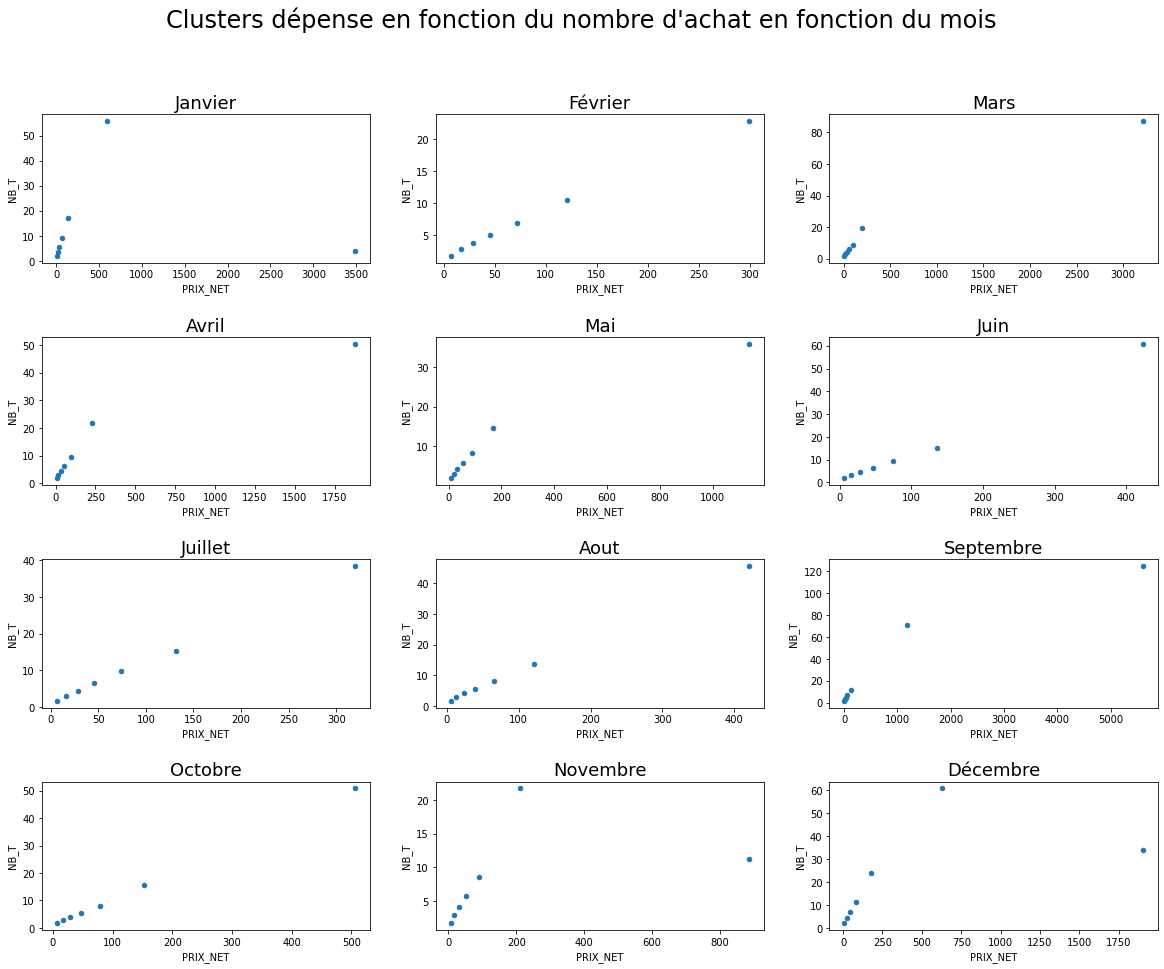

In [50]:
from matplotlib.pyplot import subplots_adjust

nrow=4
ncol=3
fig, axes = plt.subplots(nrow, ncol, figsize=(20,15))
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
count = 0

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
fig.suptitle("Clusters dépense en fonction du nombre d'achat en fonction du mois", fontsize=24)
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(months[i], fontsize=18) # 3
for r in range(nrow):
    for c in range(ncol):
        df_cluster_point = pd.DataFrame(kmean_cluster_centers_list[count], columns=["PRIX_NET", "NB_T"])
        df_cluster_point.plot.scatter(x="PRIX_NET", y="NB_T", ax=axes[r,c])
        count += 1

#### All cient profile clustered graph

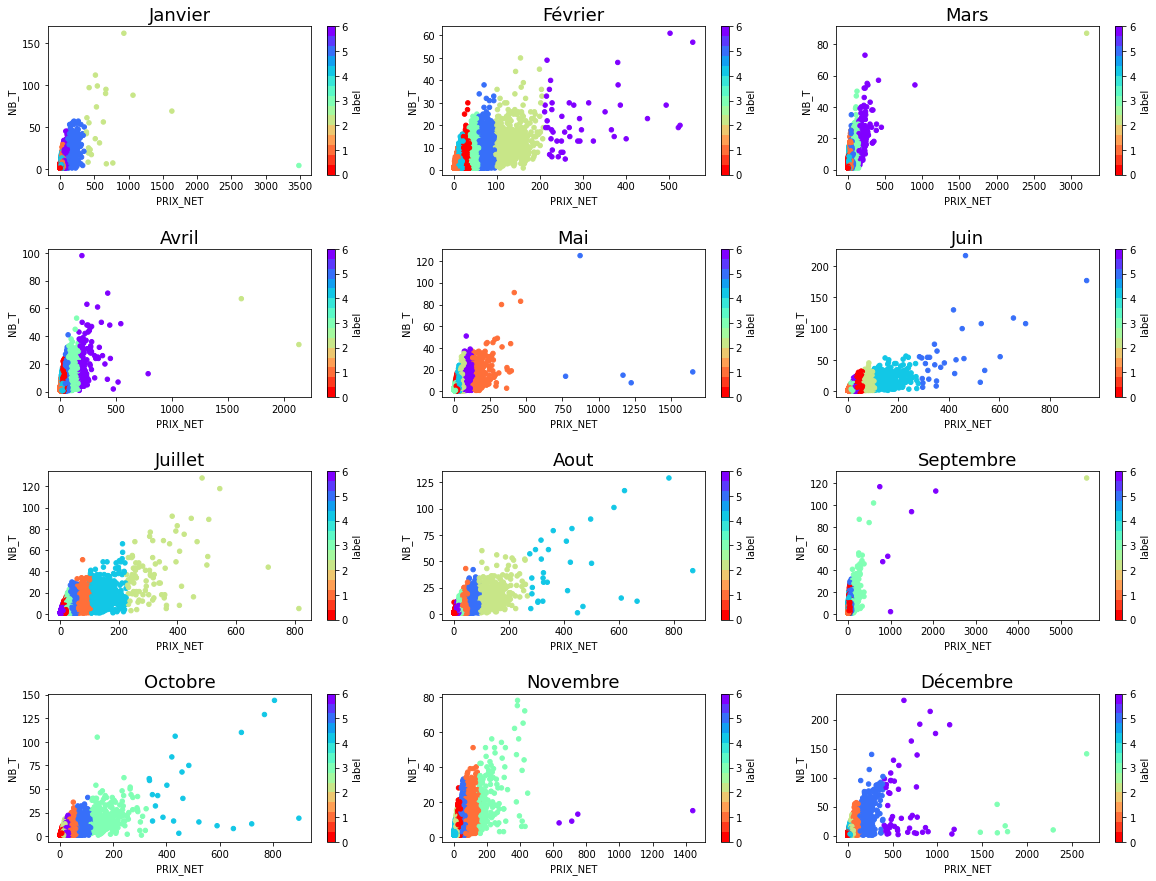

In [51]:
color_map = plt.get_cmap('rainbow', nb_cluster) 
reversed_color_map = color_map.reversed()
month = range(1, 13)
nrow=4
ncol=3
fig, axes = plt.subplots(nrow, ncol, figsize=(20,15))
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
count = 0

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(months[i], fontsize=18) # 3
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot.scatter(x="PRIX_NET", y="NB_T", c="label", colormap=reversed_color_map, ax=axes[r,c])
        count += 1

### 4eme Etape: trouver le cluster depuis un id client


### 5eme Etape: trouver quel mail fait parti de se cluster


### 6eme Recommandation dans la mail